In [75]:
# وارد کردن کتابخانه‌ها
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# بارگذاری داده
data = pd.read_csv("D:/Programming/data-set/ab_testing.csv")

# نمایش اطلاعات اولیه
print("اطلاعات کلی دیتا:")
print(data.info())
print("\nخلاصه آماری دیتا:")
print(data.describe())

# بررسی داده‌های گمشده
print("\nتعداد داده‌های گمشده در هر ستون:")
print(data.isnull().sum())

اطلاعات کلی دیتا:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None

خلاصه آماری دیتا:
            User ID   Page Views   Time Spent
count   5000.000000  5000.000000  5000.000000
mean   14925.159000     7.537600   242.512600
std     2869.153773     4.022465   118.254153
min    10001.000000     1.000000    40.000000
25%    12456.250000     4.000000   137.000000
50%    14858.500000     8.000000   243.000000
75%    17379.750000    11.000000   346.000000
max    19995.000000    14.000000   449.000000

تعداد داده‌های گمشده در ه

In [76]:
# حذف ردیف‌هایی با مقادیر منفی
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    data = data[data[col] >= 0]

# بررسی و تبدیل ستون‌های رشته‌ای به عددی یا دودویی
categorical_columns = data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

print("\nداده‌ها پس از پاکسازی:")
print(data.head())


داده‌ها پس از پاکسازی:
   User ID  Group  Page Views  Time Spent  Conversion  Device  Location
0    14292      0           3         424           0       0         0
1    11682      1           9         342           0       0         1
2    19825      1           2         396           0       1         0
3    16080      0           4         318           0       1         2
4    18851      1           1         338           1       1         1


In [77]:
from sklearn.preprocessing import StandardScaler

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# تبدیل دوباره به DataFrame برای سهولت
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

print("\nداده‌های نرمال‌شده:")
print(data_normalized.head())


داده‌های نرمال‌شده:
    User ID     Group  Page Views  Time Spent  Conversion    Device  Location
0 -0.220700 -1.007629   -1.128177    1.534877   -0.327749 -1.015317 -1.340827
1 -1.130467  0.992429    0.363595    0.841386   -0.327749 -1.015317 -0.444672
2  1.707936  0.992429   -1.376806    1.298075   -0.327749  0.984914 -1.340827
3  0.402543 -1.007629   -0.879549    0.638413   -0.327749  0.984914  0.451483
4  1.368429  0.992429   -1.625435    0.807557    3.051111  0.984914 -0.444672


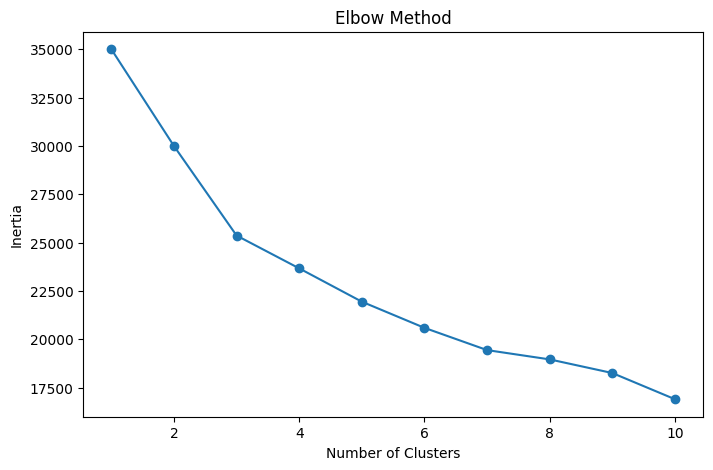

In [78]:
from sklearn.cluster import KMeans

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# اجرای K-Means با تعداد بهینه (مثلاً 3 خوشه)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data_normalized)

In [79]:
from sklearn.cluster import DBSCAN

# اجرای DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_normalized)

print("\nنتایج DBSCAN:")
print(data['DBSCAN_Cluster'].value_counts())


نتایج DBSCAN:
DBSCAN_Cluster
-1      2161
 16      107
 31      102
 46       85
 23       84
        ... 
 198       3
 207       3
 206       3
 193       3
 224       3
Name: count, Length: 229, dtype: int64


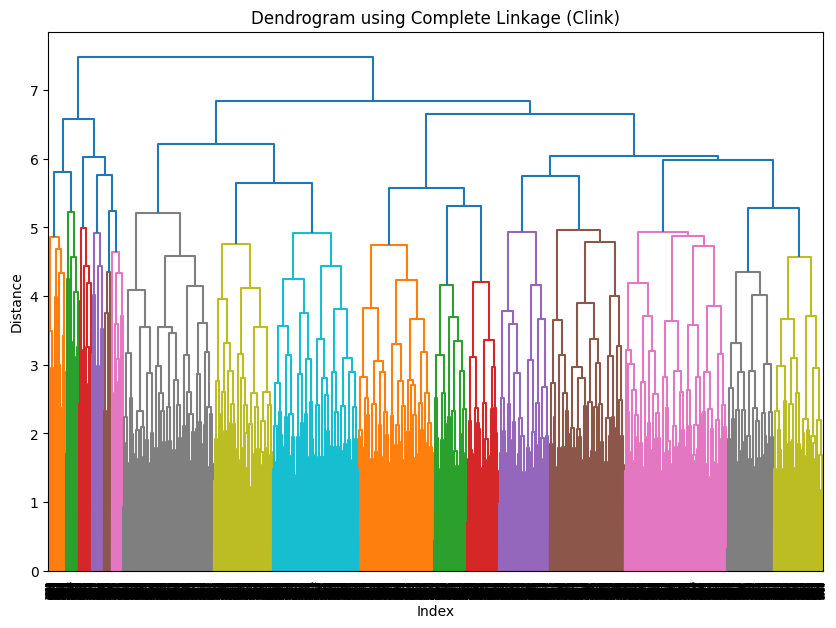

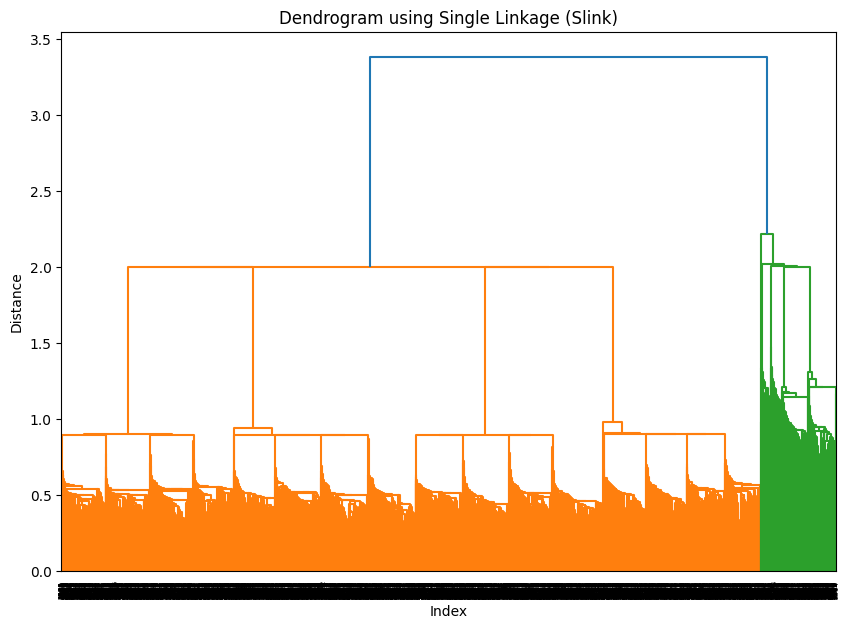

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# پیوند سلسله‌مراتبی با روش Clink (پیوند کامل)
Z_clink = linkage(data_normalized, method='complete')  # 'complete' = Clink

# رسم درخت دندروگرام برای Clink
plt.figure(figsize=(10, 7))
dendrogram(Z_clink)
plt.title("Dendrogram using Complete Linkage (Clink)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

# پیوند سلسله‌مراتبی با روش Slink (پیوند تک)
Z_slink = linkage(data_normalized, method='single')  # 'single' = Slink

# رسم درخت دندروگرام برای Slink
plt.figure(figsize=(10, 7))
dendrogram(Z_slink)
plt.title("Dendrogram using Single Linkage (Slink)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [81]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# خوشه‌بندی KMeans
kmeans_score = silhouette_score(data_normalized, data['KMeans_Cluster'])
kmeans_db_index = davies_bouldin_score(data_normalized, data['KMeans_Cluster'])

# خوشه‌بندی DBSCAN
dbscan_score = silhouette_score(data_normalized, data['DBSCAN_Cluster'])
dbscan_db_index = davies_bouldin_score(data_normalized, data['DBSCAN_Cluster'])

# خوشه‌بندی Hierarchical (با استفاده از Clink)
from scipy.cluster.hierarchy import fcluster
clink_clusters = fcluster(Z_clink, t=3, criterion='maxclust')  # t: تعداد خوشه‌ها
clink_score = silhouette_score(data_normalized, clink_clusters)
clink_db_index = davies_bouldin_score(data_normalized, clink_clusters)

# خوشه‌بندی Hierarchical (با استفاده از Slink)
slink_clusters = fcluster(Z_slink, t=3, criterion='maxclust')
slink_score = silhouette_score(data_normalized, slink_clusters)
slink_db_index = davies_bouldin_score(data_normalized, slink_clusters)

# نمایش نتایج
print("KMeans - Silhouette Score: ", kmeans_score)
print("KMeans - Davies-Bouldin Index: ", kmeans_db_index)
print("\nDBSCAN - Silhouette Score: ", dbscan_score)
print("DBSCAN - Davies-Bouldin Index: ", dbscan_db_index)
print("\nClink (Complete Linkage) - Silhouette Score: ", clink_score)
print("Clink (Complete Linkage) - Davies-Bouldin Index: ", clink_db_index)
print("\nSlink (Single Linkage) - Silhouette Score: ", slink_score)
print("Slink (Single Linkage) - Davies-Bouldin Index: ", slink_db_index)

KMeans - Silhouette Score:  0.18429781232447584
KMeans - Davies-Bouldin Index:  1.8931868612849136

DBSCAN - Silhouette Score:  -0.16199707752410783
DBSCAN - Davies-Bouldin Index:  1.3443505457744307

Clink (Complete Linkage) - Silhouette Score:  0.09925271472556584
Clink (Complete Linkage) - Davies-Bouldin Index:  2.6214082858453427

Slink (Single Linkage) - Silhouette Score:  0.2692682147476545
Slink (Single Linkage) - Davies-Bouldin Index:  1.160623692484536
